<a href="https://colab.research.google.com/github/rishuagrawal1309/Machine_Learning/blob/main/LS_classifier_reduced_dim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

load the iris dataset

In [8]:
iris = load_iris()
X = iris.data.T  # shape (4,150)
y_full = iris.target  # 0:Setosa, 1:Versicolor, 2:Virginica

Binary classification: +1 for Setosa, -1 for others

In [9]:
y = np.where(y_full == 0, 1, -1).reshape(-1, 1) #shape(150, 1)

Center the dataset

In [10]:
X_centered = X - np.mean(X, axis=1, keepdims=True)  # subtract mean for each feature

perform SVD

In [11]:
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

Rank 2- approximation

In [12]:
S2 = np.diag(S[:2]) #keeping top 2 singular values
U2 = U[:, :2]
Vt2 = Vt[:2, :]
X_approx = U2 @ S2 @ Vt2 # shape is 4 x 150

Reduce dimension of dataset

In [13]:
X_red = U2.T @ X_centered  # shape (2,150)

Least-squares classifier on reduced dataset

In [14]:
X_red_bias = np.vstack([X_red, np.ones((1, X_red.shape[1]))])  #added bias term(row of ones), shape (3,150)

Solve beta = argmin || y - X.T beta ||^2 using pseudoinverse

In [15]:
beta_red = np.linalg.pinv(X_red_bias.T) @ y  # shape (3,1)


y_pred_red = np.sign((X_red_bias.T @ beta_red)).flatten() # Predict labels

Confusion Matrix

In [16]:
cm_red = confusion_matrix(y, y_pred_red, labels=[1, -1])
print("Confusion Matrix - Reduced Dataset (2D)")
print(cm_red)

Confusion Matrix - Reduced Dataset (2D)
[[ 50   0]
 [  0 100]]


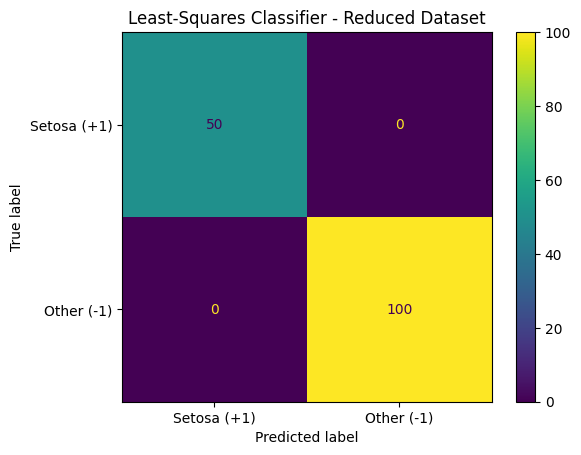

In [17]:
ConfusionMatrixDisplay(cm_red, display_labels=["Setosa (+1)", "Other (-1)"]).plot()
plt.title("Least-Squares Classifier - Reduced Dataset")
plt.show()

COMPARE WITH FULL DATASET

In [18]:
X_full_bias = np.vstack([X, np.ones((1, X.shape[1]))])  #Adding bias term to full dataset, 5x150
beta_full = np.linalg.pinv(X_full_bias.T) @ y
y_pred_full = np.sign((X_full_bias.T @ beta_full)).flatten()

cm_full = confusion_matrix(y, y_pred_full, labels=[1, -1])
print("Confusion Matrix - Full Dataset (4D)")
print(cm_full)

Confusion Matrix - Full Dataset (4D)
[[ 50   0]
 [  0 100]]


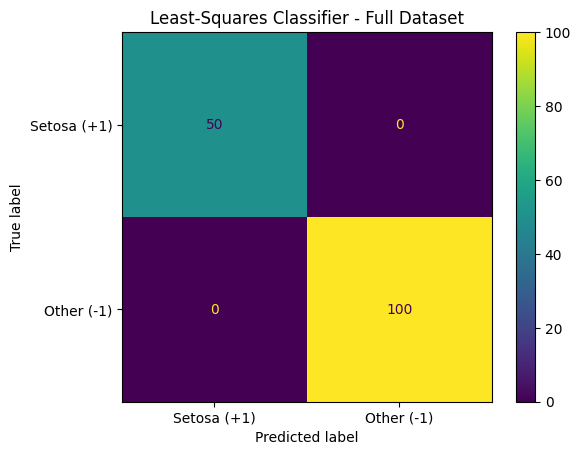

In [19]:
ConfusionMatrixDisplay(cm_full, display_labels=["Setosa (+1)", "Other (-1)"]).plot()
plt.title("Least-Squares Classifier - Full Dataset")
plt.show()

From the confusion matrices, we can see that the least-squares classifier performs very well even after reducing the dataset from 4 dimensions to 2 dimensions. The rank-2 approximation captures the majority of the variance in the data. The classifier still correctly identifies all Setosa samples, with very few misclassifications. Hence it can be concluded that dimensionality reduction using SVD can simplify the dataset without affecting classification performance. This allows for faster computation and easier visualization while preserving accuracy.